2018/05/16特別研修に向けた実験

櫻岡響

# 分析と作図

In [1]:
from anakin.util.word import Word

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pylab

%matplotlib inline

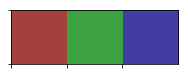

In [2]:
palette=sns.hls_palette(n_colors=3, h=.33 * 0.02, l=.44, s=.45)
sns.palplot(palette)

In [3]:
pd.options.display.max_rows = 10
pd.options.display.precision = 3

In [4]:
sns.set(
    font='Arial',
    context='paper',
    font_scale=2.6,
    style='ticks',
    palette=palette
)

In [5]:
step_df = pd.read_csv('count_step.csv', index_col=0)\
    .rename(columns={
        'pair_wise':'pairwise',
        'col_num_all':'consonant(full)',
        'col_num_sq':'consonant(simple)',
    })
step_df2 = step_df.iloc[:, 2:].div(step_df.iloc[:, 1], axis=0)
step_df

,sentence,traditional,pairwise,consonant(full),consonant(simple)
0,多少/タショウ たばこ/タバコ の/ノ 臭い/ニオイ が/ガ 気/キ に/ニ なっ/ナッ た...,150,115,103,53
1,禁煙/キンエン ルーム/ルーム の/ノ 設定/セッテイ を/ヲ し/シ て/テ も/モ 良い...,166,116,110,48
2,車/クルマ で/デ の/ノ 宿泊/シュクハク に/ニ なる/ナル の/ノ です/デス が/ガ...,154,104,109,57
3,ホテル/ホテル は/ハ 昔/ムカシ の/ノ 旅館/リョカン という/トイウ 感じ/カンジ で...,251,201,150,76
4,設備/セツビ は/ハ 少し/スコシ 古/コ め/メ です/デス が/ガ 手入れ/テイレ が/...,125,100,70,38
...,...,...,...,...,...
96,ホテル/ホテル 内/ナイ の/ノ ブティック/ブティック で/デ ハンドバック/ハンドバック...,195,130,134,62
97,部屋/ヘヤ も/モ 下手/ヘタ な/ナ ビジ/ビジ に/ニ 泊まる/トマル より/ヨリ よっ...,162,97,113,55
98,部屋/ヘヤ が/ガ 清潔/セイケツ に/ニ 保た/タモタ れ/レ て/テ い/イ て/テ 好...,124,89,81,37
99,さて/サテ 予約/ヨヤク 画面/ガメン が/ガ <num> 月/ツキ まで/マデ しか/シカ...,267,182,188,92


In [6]:
moji_size = [len(''.join(w.yomi for w in Word.from_sentence(i))) for i in step_df['sentence']]
sum(moji_size)

3752

In [7]:
step_df.iloc[:, 1:].sum() 

traditional          18383
pairwise             12878
consonant(full)      12358
consonant(simple)     5968
dtype: int64

In [8]:
step_df.iloc[:, 1:].sum() / sum(moji_size)

traditional          4.900
pairwise             3.432
consonant(full)      3.294
consonant(simple)    1.591
dtype: float64

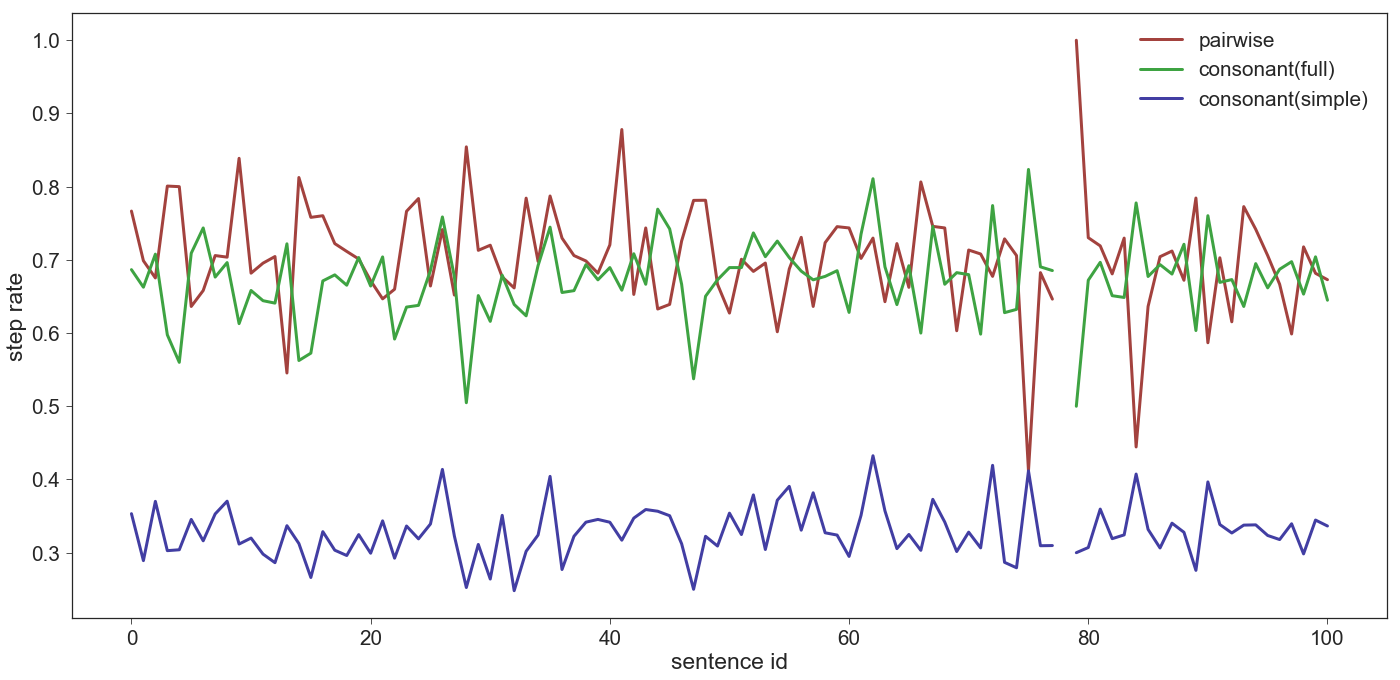

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))

for i, m in enumerate(step_df2.columns):
    ax.plot(
        np.arange(101),
        step_df2[m],
        lw=3
    )
ax.set_xlabel('sentence id')
ax.set_ylabel('step rate')
ax.legend()
fig.tight_layout()
fig.savefig('step1.pdf')

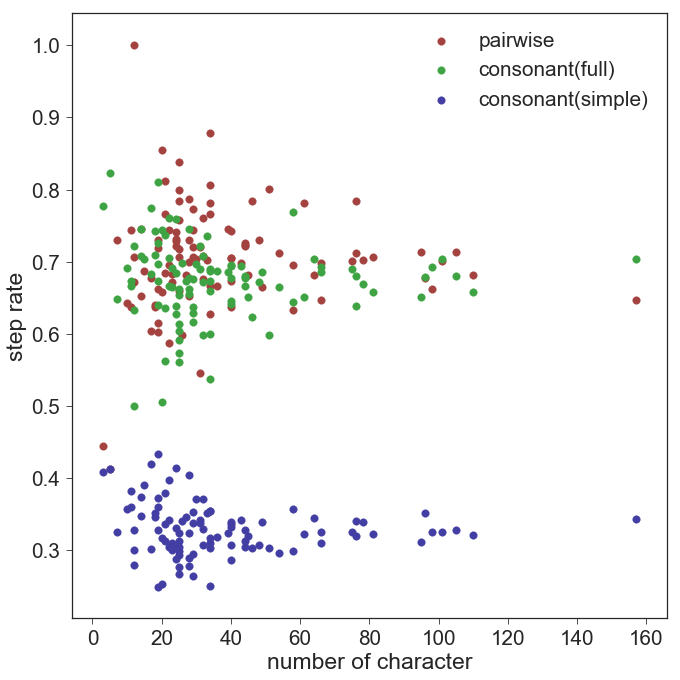

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
for i, m in enumerate(step_df2.columns):
    ax.scatter(
        moji_size,
        step_df2[m],
        s=60
    )
ax.set_xlabel('number of character')
ax.set_ylabel('step rate')
ax.legend()
fig.tight_layout()
fig.savefig('step2.pdf')

In [11]:
def file_name2df(name):
    close_df = pd.read_csv(name, index_col=0).rename(columns={'perfect':'exact match', 'yomi':'kana match'})
    close_df2 = close_df.iloc[:, 3:5].div(close_df.iloc[:, 2], axis=0)
    close_df2['kana match'] = close_df2['exact match'] + close_df2['kana match']
    close_df2['ref_size'] = close_df['ref_size']
    close_df2['miss'] = - close_df['miss'].div(close_df.iloc[:, 2], axis=0)
    close_df2 = close_df2.loc[:, ['ref_size', 'exact match', 'kana match', 'miss']]
    return close_df, close_df2

In [12]:
file_name = 'result_close.csv'
close_df, close_df2 = file_name2df(file_name)

file_name = 'result_open.csv'
open_df, open_df2 = file_name2df(file_name)

In [13]:
open_df2[open_df2.ref_size == 67]

,ref_size,exact match,kana match,miss
21,67,0.925,0.94,0.015


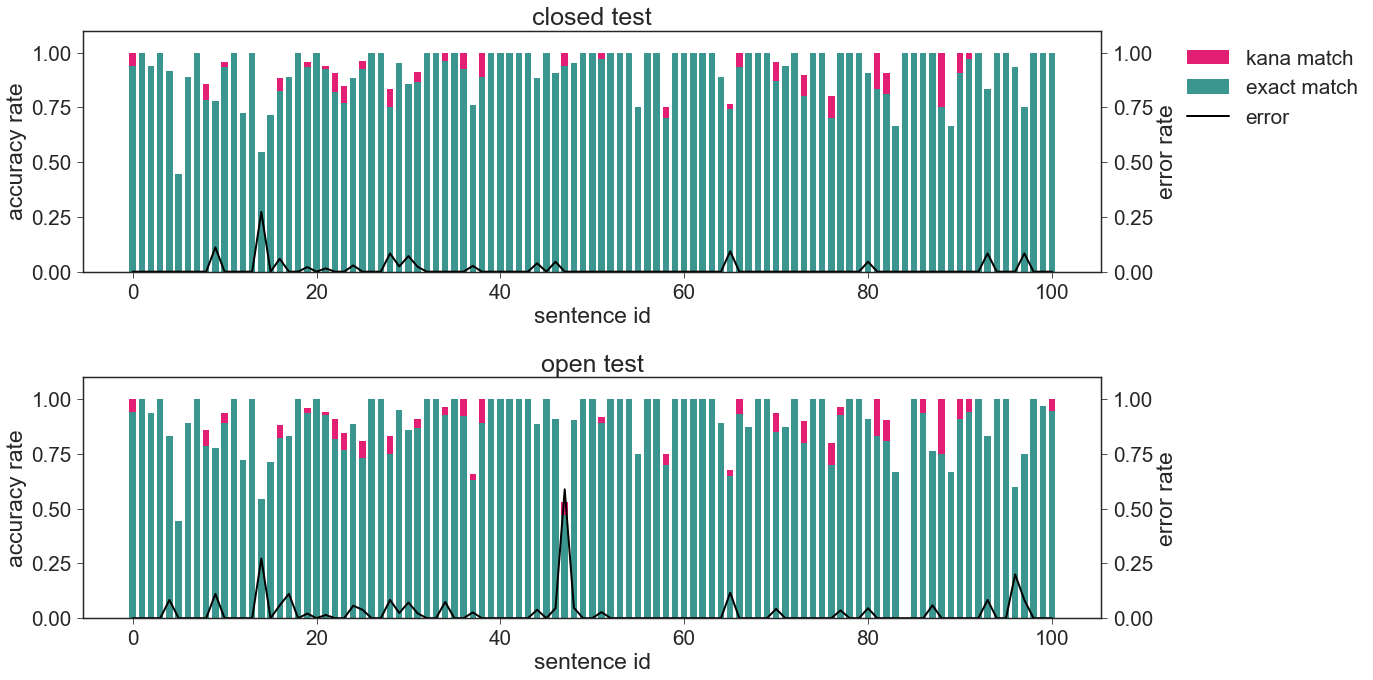

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(17, 10))

blue = np.array((58, 150, 143))/255
red = np.array((227, 31, 116))/255

for ax, df, t in zip(axes, (close_df2, open_df2), ('closed test', 'open test')):
    for (i, m), c in zip(enumerate(reversed(df.columns[1:3])), (red, blue)):
        ax.bar(
            np.arange(101),
            df[m],
            width=0.7,
            color=c,
            label=m
        )
    ax.set_ylim(0, 1.1)
    ax.set_xlabel('sentence id')
    ax.set_ylabel('accuracy rate')
    ax.set_title(t)
    
    ax2 = ax.twinx()
    ax2.plot(
        np.arange(101),
        df['miss'],
        color='k',
        lw=2,
        label='error'
    )
    ax2.set_ylabel('error rate')
    ax2.set_ylim(0, 1.1)
    
    h1, l1 = ax.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()

lgd = axes[0].legend(h1+h2, l1+l2, bbox_to_anchor=(1.27, 1))
fig.tight_layout()
fig.savefig('estimate.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [15]:
def result(df):
    sum_ = df.iloc[:, 2:].sum()
    sum_['kana match'] += sum_['exact match']
    
    rate = sum_[1:3] / sum_[0]
    
    return sum_, rate

In [16]:
close_sum, close_rate = result(close_df)
close_sum

ref_size       1688
exact match    1545
kana match     1578
miss            -22
dtype: int64

In [17]:
close_rate

exact match    0.915
kana match     0.935
dtype: float64

In [18]:
open_sum, open_rate = result(open_df)
open_sum

ref_size       1688
exact match    1490
kana match     1530
miss            -50
dtype: int64

In [19]:
open_rate

exact match    0.883
kana match     0.906
dtype: float64

In [20]:
id= 47
for i in ['ref', 'est']:
    str_ = open_df.iloc[id][i]
    print(str_)
print(open_df.iloc[id, 3:])

そう / 思え / ば / 敢えて / 書き込む / こと / で / も / ない / の / だ / が / 一応 / 感想 / を / 述べ / た
そう / 思え / ば / あえて / 書き込み / が / とても / 内 / に / 近い / という / 感想 / を / 述べ / た
exact match      8
kana match       1
miss           -10
Name: 47, dtype: object


In [21]:
id= 84
for i in ['ref', 'est']:
    str_ = open_df.iloc[id][i]
    print(str_)
print(open_df.iloc[id, 3:])

るる / ぶ
れれ / ば
exact match    0
kana match     0
miss           0
Name: 84, dtype: object


In [22]:
for id_ in range(100):
    if open_df2['exact match'][id_] == 1.0:
        continue
    print(id_)
    for i in ['ref', 'est']:
        str_ = open_df.iloc[id_][i]
        print(str_)
    print(open_df.iloc[id_, 3:])
    print()

0
多少 / たばこ / の / 臭い / が / 気 / に / なっ / た / くらい / で / 後 / は / すべて / 気に入り / まし / た
多少 / タバコ / の / 臭い / が / 気 / に / なっ / た / くらい / で / 後 / は / すべて / 気に入り / まし / た
exact match    16
kana match      1
miss            0
Name: 0, dtype: object

2
車 / で / の / 宿泊 / に / なる / の / です / が / 駐車 / 場 / は / 空い / て / ます / か
車 / で / の / 宿泊 / に / なる / の / です / が / 駐車 / 場 / は / 空い / て / ます / が
exact match    15
kana match      0
miss            0
Name: 2, dtype: object

4
設備 / は / 少し / 古 / め / です / が / 手入れ / が / 行き届い / てる / ので
設備 / は / 少し / 古 / め / です / が / トイレ / が / 行き届い / てる / な / と
exact match    10
kana match      0
miss           -1
Name: 4, dtype: object

5
の / 中 / から / お / 好み / の / 枕 / を / 選べる
何 / か / カラオケ / の / 目 / の / 枕 / を / 選べる
exact match    4
kana match     0
miss           0
Name: 5, dtype: object

6
あまりの / も / 簡単 / に / 予約 / でき / まし / た / ので
あまりに / も / 簡単 / に / 予約 / でき / まし / た / ので
exact match    8
kana match     0
miss           0
Name: 6, dtype: object

8
厚木 / の / 宿泊 / で / は / 必ず / 利用 / さ 

In [23]:
for s in open_df['ref'][:5]:
    s2 = ''.join(s.split(' / '))
    print(s2)

多少たばこの臭いが気になったくらいで後はすべて気に入りました
禁煙ルームの設定をしても良いのではないでしょうか
車での宿泊になるのですが駐車場は空いてますか
ホテルは昔の旅館という感じでノスタルジックですが掃除が行き届いていてとても清潔でした
設備は少し古めですが手入れが行き届いてるので


In [24]:
open_df['ref'][:5]

0    多少 / たばこ / の / 臭い / が / 気 / に / なっ / た / くらい /...
1    禁煙 / ルーム / の / 設定 / を / し / て / も / 良い / の / で...
2    車 / で / の / 宿泊 / に / なる / の / です / が / 駐車 / 場 ...
3    ホテル / は / 昔 / の / 旅館 / という / 感じ / で / ノスタルジック ...
4    設備 / は / 少し / 古 / め / です / が / 手入れ / が / 行き届い ...
Name: ref, dtype: object